In [3]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: cannot unpack non-iterable AxesSubplot object

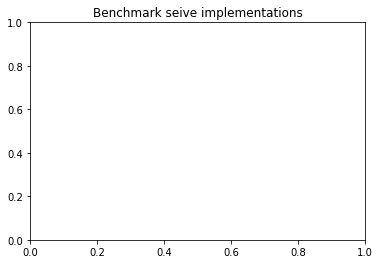

In [22]:
# ypoints1 = np.array([7.121486, 3.466678, 3.302563, 0.921523])
# ypoints2 = np.array([3.531183, 1.672209, 1.615805, 0.459895])
# ypoints3 = np.array([1.721986, 0.812992, 0.755818, 0.239177])
# ypoints4 = np.array([0.833410, 0.426704, 0.315242, 0.127623])

ypoints1 = np.array([7.121486, 3.466678, 3.302563, 0.921523])
ypoints2 = np.array([3.531183, 1.672209, 1.615805, 0.459895])
ypoints3 = np.array([1.721986, 0.812992, 0.755818, 0.239177])
ypoints4 = np.array([0.833410, 0.426704, 0.315242, 0.127623])

plt.title('Benchmark seive implementations')

fig, ax = plt.subplot()
ax.set_xlabel("X_axis_title")
ax.set_ylabel("Y_axis_title")

x1 = np.array([64, 128, 256, 512])
y1 = np.array([7.121486, 3.531183, 1.721986, 0.833410])
fig.plot(x1, y1, 'or-', label = 'parallel')
# plt.plot(ypoints2, 'og-', label = 'n = 128')
# plt.plot(ypoints3, 'ob-', label = 'n = 256')
# plt.plot(ypoints4, 'oy-', label = 'n = 512')
ax.legend()
plt.show()